# MiniLab 1: Fuel Consumption Analysis

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("../data/fuel_consumption.csv")
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,10.2,7.0,8.8,32,202
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,9.6,7.0,8.4,34,193
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,9.4,7.0,8.3,34,191
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,12.6,8.9,10.9,26,251
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,13.0,9.3,11.3,25,260


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17766 entries, 0 to 17765
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            17766 non-null  int64  
 1   Make                  17766 non-null  object 
 2   Model                 17766 non-null  object 
 3   Vehicle class         17766 non-null  object 
 4   Engine size (L)       17766 non-null  float64
 5   Cylinders             17766 non-null  int64  
 6   Transmission          17766 non-null  object 
 7   Fuel type             17766 non-null  object 
 8   City (L/100 km)       17766 non-null  float64
 9   Highway (L/100 km)    17766 non-null  float64
 10  Combined (L/100 km)   17766 non-null  float64
 11  Combined (mpg)        17766 non-null  int64  
 12  CO2 emissions (g/km)  17766 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 1.8+ MB


In [55]:
fuel_cat = df["Fuel type"].unique()
fuel_cat

array(['X', 'Z', 'D', 'N', 'E'], dtype=object)

In [13]:
corr = df.corr(numeric_only=True)
corr

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
Model year,1.000000,0.053179,0.042807,-0.088232,-0.116402,-0.098747,0.135320,-0.179453
Engine size (L),0.053179,1.000000,0.901804,0.822448,0.770007,0.812942,-0.772745,0.829355
Cylinders,0.042807,0.901804,1.000000,0.785840,0.699996,0.763916,-0.723038,0.787078
City (L/100 km),-0.088232,0.822448,0.785840,1.000000,0.953155,0.993997,-0.925747,0.926010
Highway (L/100 km),-0.116402,0.770007,0.699996,0.953155,1.000000,0.979881,-0.890059,0.905472
Combined (L/100 km),-0.098747,0.812942,0.763916,0.993997,0.979881,1.000000,-0.923589,0.929144
Combined (mpg),0.135320,-0.772745,-0.723038,-0.925747,-0.890059,-0.923589,1.000000,-0.904585
CO2 emissions (g/km),-0.179453,0.829355,0.787078,0.926010,0.905472,0.929144,-0.904585,1.000000


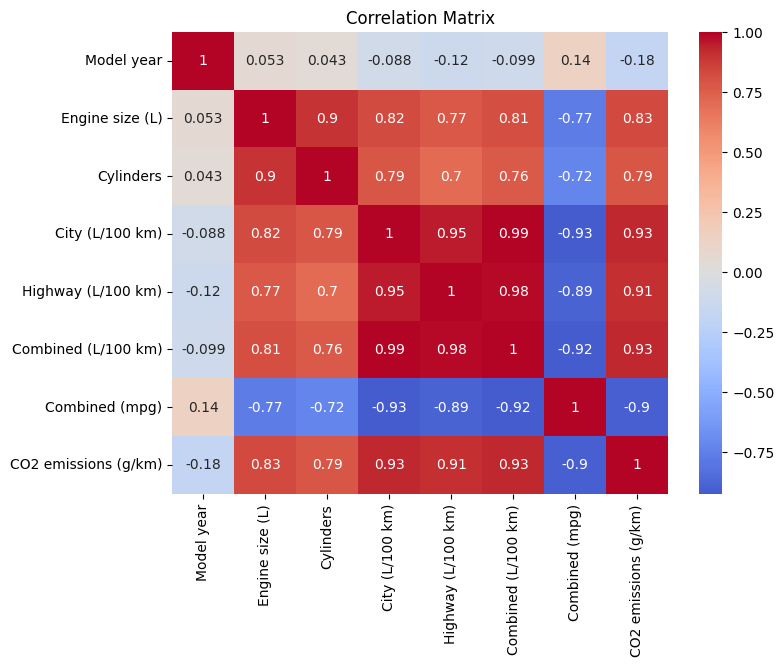

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

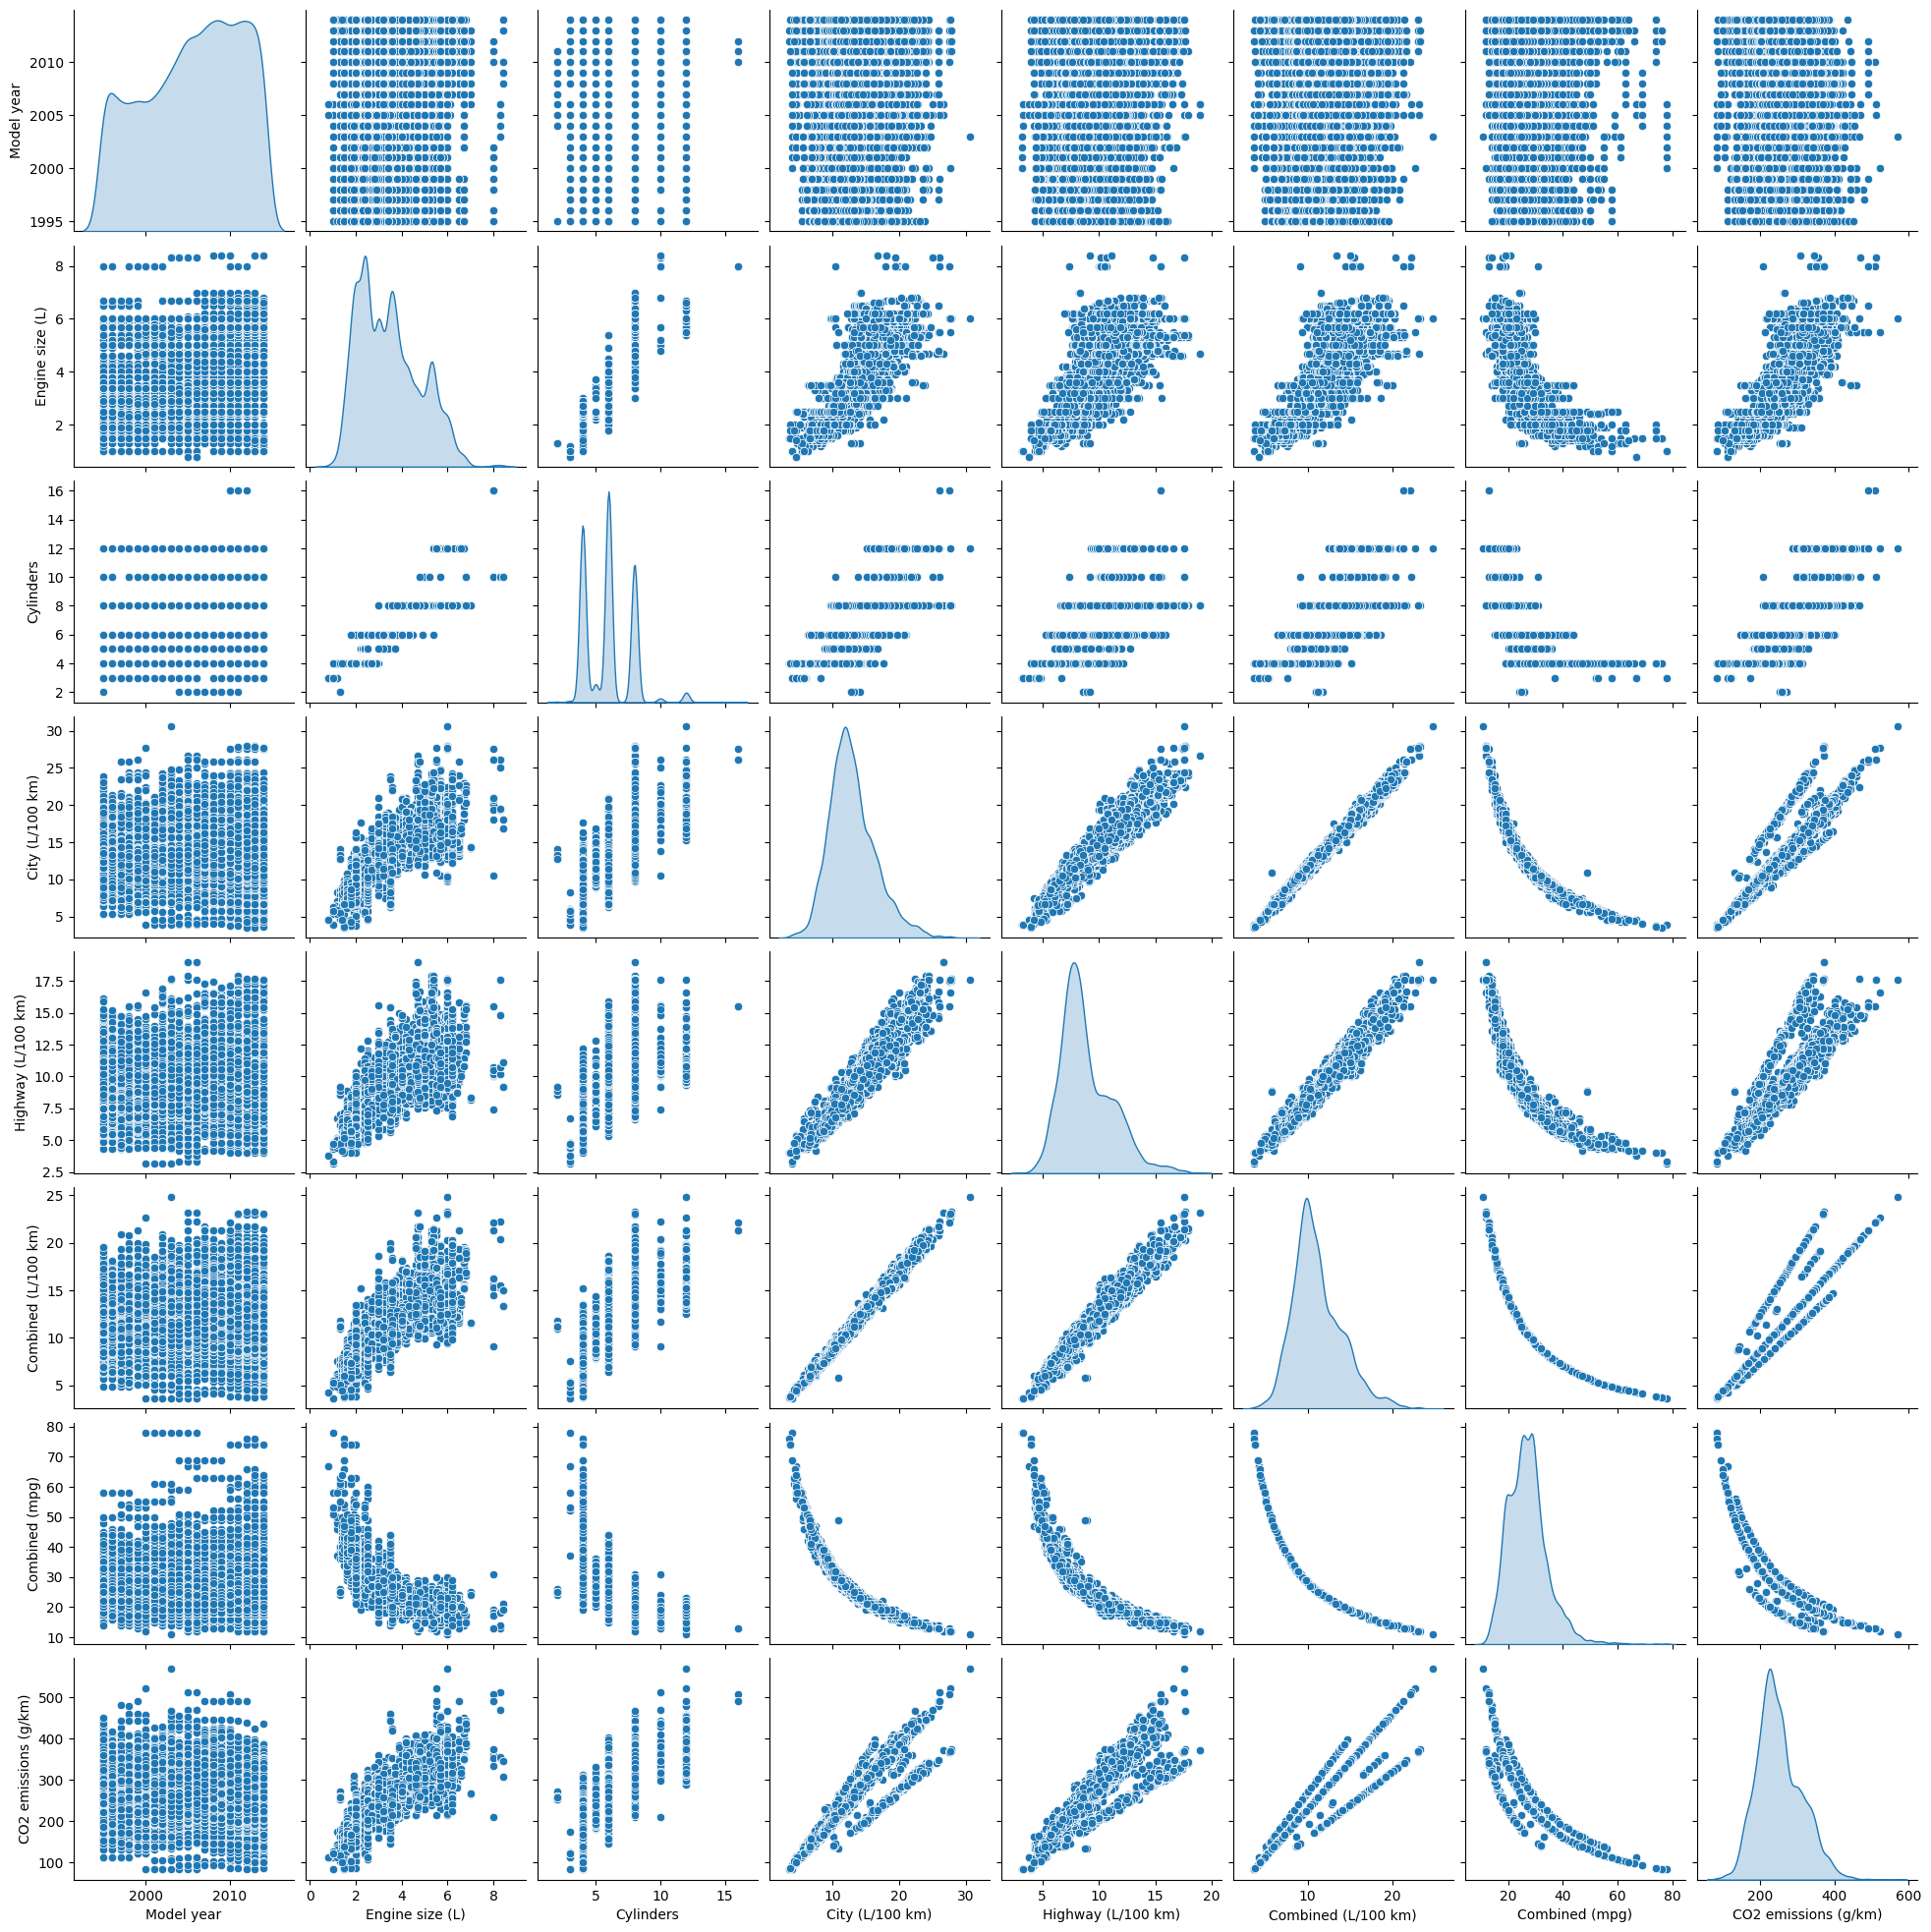

In [14]:
numeric_df = df.select_dtypes(include="number")

# Plot pairwise scatter plots
sns.pairplot(numeric_df, diag_kind="kde")  # diag_kind="hist" for histograms
plt.show()

In [18]:
formula = lambda a, combined: a * combined

In [37]:
a_values = [10, 20, 30]
y_values = [[co2 * a for co2 in df["Combined (L/100 km)"]] for a in a_values]

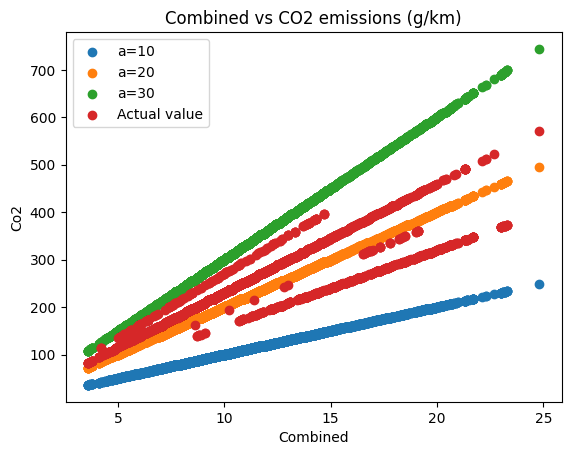

In [51]:
for i, y in enumerate(y_values):
    plt.scatter(df["Combined (L/100 km)"], y, label=f"a={a_values[i]}")
plt.scatter(df["Combined (L/100 km)"], df["CO2 emissions (g/km)"], label="Actual value")
plt.xlabel("Combined")
plt.ylabel("Co2")
plt.title("Combined vs CO2 emissions (g/km)")
plt.legend()
plt.show()

In [83]:
r2 = r2_score(df["CO2 emissions (g/km)"], y_values[1])
print(f"R² = {r2:.3f}")

R² = 0.637


In [76]:
model = LinearRegression(fit_intercept=False)
model.fit(df[["Combined (L/100 km)"]], df["CO2 emissions (g/km)"])
best_a = model.coef_[0]
best_a

np.float64(22.337223628284228)

In [77]:
best_a_y_values = [co2 * best_a for co2 in df["Combined (L/100 km)"]]

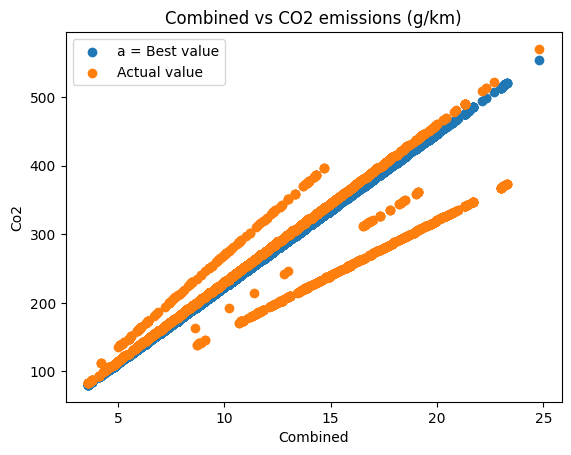

In [79]:
plt.scatter(df["Combined (L/100 km)"], best_a_y_values, label="a = Best value")

plt.scatter(df["Combined (L/100 km)"], df["CO2 emissions (g/km)"], label="Actual value")
plt.xlabel("Combined")
plt.ylabel("Co2")
plt.title("Combined vs CO2 emissions (g/km)")
plt.legend()
plt.show()

In [85]:
r2_best = r2_score(df["CO2 emissions (g/km)"], best_a_y_values)
print(f"R² = {r2_best:.3f}")

R² = 0.837


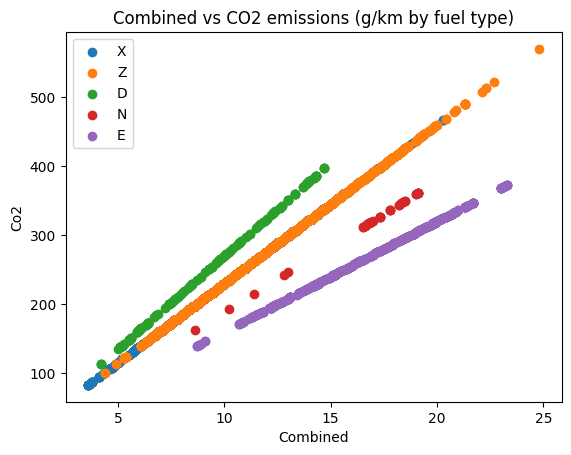

In [67]:
for cat in fuel_cat:
    subset = df[df["Fuel type"] == cat]
    plt.scatter(
        subset["Combined (L/100 km)"], subset["CO2 emissions (g/km)"], label=cat
    )
plt.xlabel("Combined")
plt.ylabel("Co2")
plt.title("Combined vs CO2 emissions (g/km by fuel type)")
plt.legend()
plt.show()

In [86]:
is_diesel = df[df["Fuel type"] == "D"]
is_essence = df[df["Fuel type"] == "E"]

In [117]:
b_values = [50, 100, 150]
c_values = [50, 100, 150]

y_values = [
    [
        [
            best_a * x1 + b * (1 if fuel == "D" else 0) + c * (1 if fuel == "E" else 0)
            for x1, fuel in zip(df["Combined (L/100 km)"], df["Fuel type"])
        ]
        for c in c_values
    ]
    for b in b_values
]

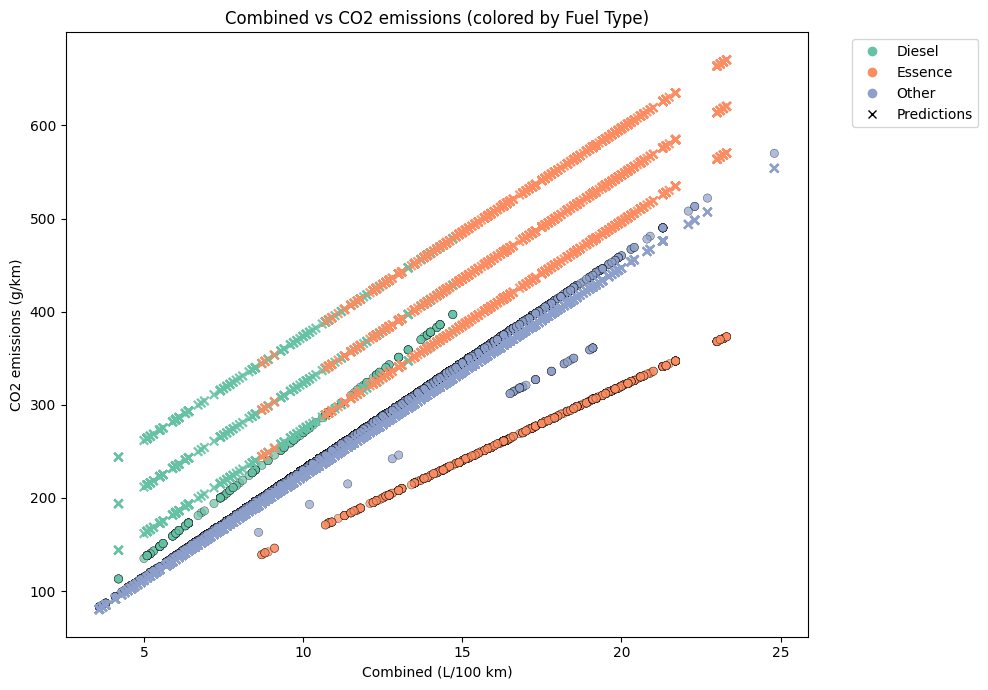

In [133]:
x1 = df["Combined (L/100 km)"]
fuel = df["Fuel type"]
y_true = df["CO2 emissions (g/km)"]

# Define a prettier palette
palette = {
    "D": sns.color_palette("Set2")[0],  # soft green
    "E": sns.color_palette("Set2")[1],  # soft orange
    "Other": sns.color_palette("Set2")[2],
}  # soft purple

# Map fuel types (default to "Other" if not D or E)
fuel_mapped = fuel.map({"D": "D", "E": "E"}).fillna("Other")
colors = fuel_mapped.map(palette)

plt.figure(figsize=(10, 7))

# --- Actual values ---
plt.scatter(
    x1, y_true, c=colors, label="Actual values", alpha=0.7, edgecolor="k", linewidth=0.3
)

# --- Predictions ---
for i, b in enumerate(b_values):
    for j, c in enumerate(c_values):
        y_pred = y_values[i][j]
        plt.scatter(
            x1,
            y_pred,
            c=colors,  # same color coding by fuel
            alpha=0.5,
            marker="x",
            label=f"b={b}, c={c}" if i == 0 and j == 0 else None,
        )
        # label only once to avoid clutter

plt.xlabel("Combined (L/100 km)")
plt.ylabel("CO2 emissions (g/km)")
plt.title("Combined vs CO2 emissions (colored by Fuel Type)")

# Legend with fuel types
custom_legend = [
    plt.Line2D([], [], color=palette["D"], marker="o", linestyle="", label="Diesel"),
    plt.Line2D([], [], color=palette["E"], marker="o", linestyle="", label="Essence"),
    plt.Line2D([], [], color=palette["Other"], marker="o", linestyle="", label="Other"),
    plt.Line2D([], [], color="black", marker="x", linestyle="", label="Predictions"),
]
plt.legend(handles=custom_legend, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

In [134]:
# Feature columns
x1 = df["Combined (L/100 km)"]
x2 = (df["Fuel type"] == "D").astype(int)  # Diesel =1, else 0
x3 = (df["Fuel type"] == "E").astype(int)  # Essence=1, else 0

# Build feature matrix
X = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3})
y = df["CO2 emissions (g/km)"]

# Fit regression with no intercept (since you already have b, c terms)
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

best_a, best_b, best_c = model.coef_
print(f"a = {best_a:.3f}, b = {best_b:.3f}, c = {best_c:.3f}")

a = 22.959, b = 35.373, c = -117.457


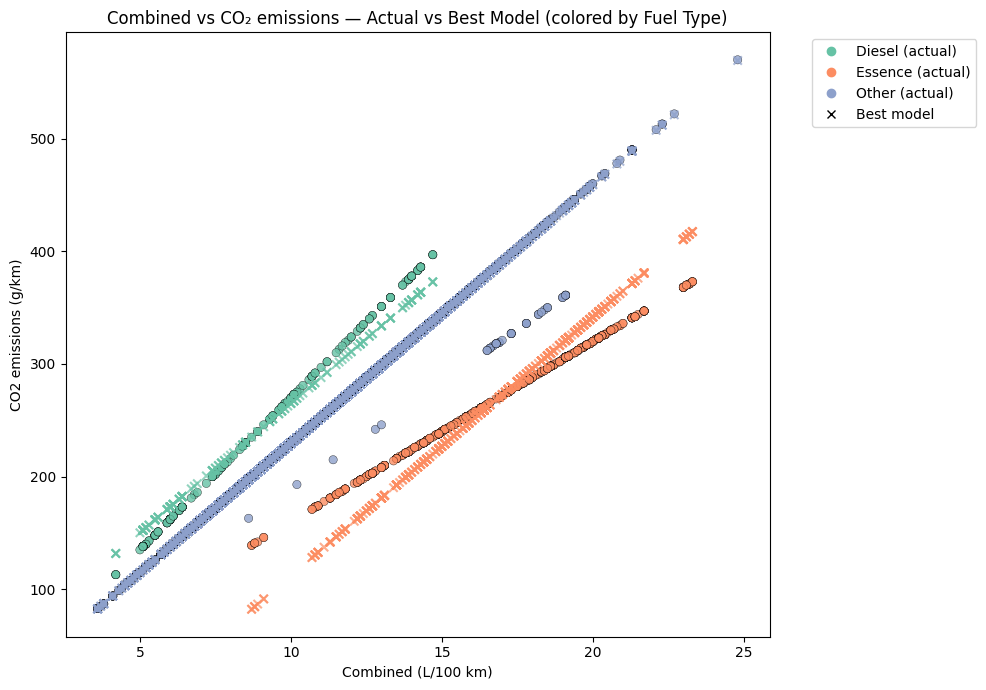

In [135]:
x1 = df["Combined (L/100 km)"]
fuel = df["Fuel type"]
y_true = df["CO2 emissions (g/km)"]

# Indicators for fuel types used in prediction
is_D = (fuel == "D").astype(int)
is_E = (fuel == "E").astype(int)

# Best prediction: y_hat = a*x1 + b*1_D + c*1_E
y_best = best_a * x1 + best_b * is_D + best_c * is_E

# Nice palette for fuel types
palette = {
    "D": sns.color_palette("Set2")[0],  # soft green
    "E": sns.color_palette("Set2")[1],  # soft orange
    "Other": sns.color_palette("Set2")[2],  # soft purple
}
fuel_mapped = fuel.map({"D": "D", "E": "E"}).fillna("Other")
colors = fuel_mapped.map(palette)

plt.figure(figsize=(10, 7))

# Actual values (colored by fuel type)
plt.scatter(
    x1, y_true, c=colors, alpha=0.8, edgecolor="k", linewidth=0.3, label="Actual"
)

# Best-model predictions (same color by fuel, different marker)
plt.scatter(x1, y_best, c=colors, alpha=0.7, marker="x", label="Best model")

plt.xlabel("Combined (L/100 km)")
plt.ylabel("CO2 emissions (g/km)")
plt.title("Combined vs CO₂ emissions — Actual vs Best Model (colored by Fuel Type)")

# Clean legend showing fuel colors and marker meaning
legend_items = [
    plt.Line2D(
        [], [], color=palette["D"], marker="o", linestyle="", label="Diesel (actual)"
    ),
    plt.Line2D(
        [], [], color=palette["E"], marker="o", linestyle="", label="Essence (actual)"
    ),
    plt.Line2D(
        [], [], color=palette["Other"], marker="o", linestyle="", label="Other (actual)"
    ),
    plt.Line2D([], [], color="black", marker="x", linestyle="", label="Best model"),
]
plt.legend(handles=legend_items, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

In [136]:
r2 = r2_score(y_true, y_best)
print(f"R² (sklearn) = {r2:.3f}")

R² (sklearn) = 0.991
